In [36]:
import pandas as pd
import numpy as np
import datetime
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)
import re
from tqdm import tqdm

#### Binomial Probability Distribution
$P(N) = \binom{n}{k}p^k(1-p)^{n-k} = \frac{n!}{n!(n-k)!} p^k(1-p)^{n-k}$

#From these examples, distinguish between samples/populations and estimators/parameters:

### samples/population

#Election polls - samples
#Results of general elections - populations
#To do an inventory - population
#Mean salary on Manhattan based on the census - population
#Mean salary on Manhattan, based on a survey - samples
#Joe's running time over 4 weeks - samples
#Mean age at marry in France - samples
#Industrial product evaluation (check durability of bulbs) - 
#Average german height - 

### 4.06 Activity 3
Try to plot a Binomial distribution for each n in [10, 100, 1000, 10000] and a constant p = 0.5. What can you see when n tends to infinite? Does it look familiar to you? What happens with the mean of the created samples?

In [2]:
# Specify values of n and p to consider for Binomial: n, p
n = [10, 100, 1000, 10000]
p = [0.5, 0.5, 0.5, 0.5]

# Draw 10,000 samples for each n,p pair: samples_binomial
for i in range(4):
    samples_binomial = np.random.binomial(n[i], p[i], 10000)
    # Print results
    print('n =', n[i], 'Binom:', np.mean(samples_binomial), np.std(samples_binomial))

n = 10 Binom: 5.004 1.5914722743422203
n = 100 Binom: 49.9811 5.044476463420164
n = 1000 Binom: 500.0322 15.806048309428894
n = 10000 Binom: 5000.2846 49.54708672404464


<Figure size 432x288 with 0 Axes>

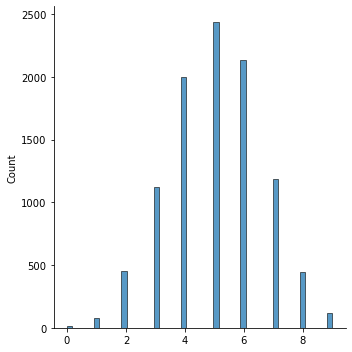

<Figure size 432x288 with 0 Axes>

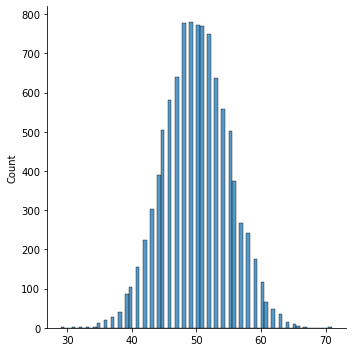

<Figure size 432x288 with 0 Axes>

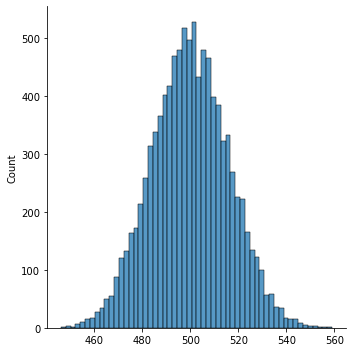

<Figure size 432x288 with 0 Axes>

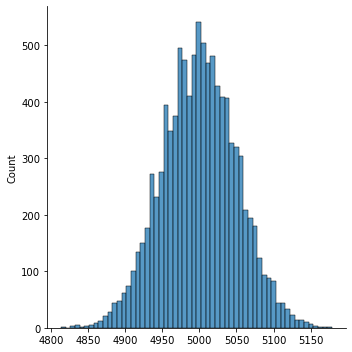

In [3]:
for i in n:
    plt.figure()
    x = np.random.binomial(n=i, p=0.5, size=10000)
    sns.displot(x)
    #plt.alxvine(np.mean(x), c='red')
plt.show()

In [4]:
# solution activity 3

AttributeError: module 'matplotlib.pyplot' has no attribute 'alxvine'

<Figure size 432x288 with 0 Axes>

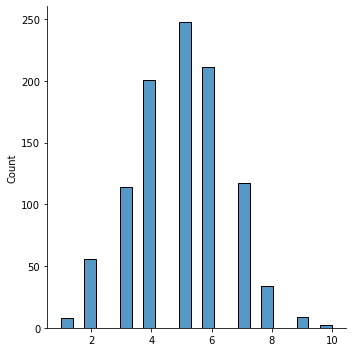

In [5]:
for i in [10, 100, 1000, 10000]:
    plt.figure()
    n_of_experiments=1000
    x = np.random.binomial(n=i, p=0.5, size=n_of_experiments)
    
    # what happens with the mean?
    mean_x = np.mean(x)
    
    sns.displot(x)
    
    plt.alxvine(mean_x, c='red')
    plt.title(f'Mean: {round(mean_x,2)} heads out of {n_of_experiments}\n experiments with {i} tosses each')
    plt.show()

In [ ]:
from scipy.stats import binom

trials = [10, 20, 30, 40, 50]
p = 0.5
fig, ax = plt.subplots(1,5,figsize=(80,20))
for i,n in enumerate(trials):
    x = np.arange(0,n)
    ax[i].plot(x, binom.pmf(x, n, p))
    ax[i].vlines(x, 0, binom.pmf(x, n, p))
    plt.plot()


In [ ]:
np.arange(0,10)

In [ ]:
binom.pmf(np.arange(0,10), n, p=0.5)

In [6]:
data = pd.read_csv('lab-random-variable-distributions/files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [7]:
numericals = data.select_dtypes(np.number)
numericals

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [17]:
import random

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 3.000e+00,
        0.000e+00, 3.000e+00, 3.000e+00, 1.000e+00, 5.000e+00, 1.000e+00,
        5.000e+00, 9.000e+00, 3.000e+00, 1.500e+01, 1.500e+01, 1.300e+01,
        1.800e+01, 2.200e+01, 1.800e+01, 3.300e+01, 3.300e+01, 4.200e+01,
        3.400e+01, 5.700e+01, 8.400e+01, 6.800e+01, 1.040e+02, 1.140e+02,
        1.220e+02, 1.700e+02, 1.760e+02, 2.230e+02, 2.260e+02, 2.540e+02,
        2.610e+02, 3.090e+02, 3.450e+02, 3.980e+02, 4.150e+02, 4.800e+02,
        5.060e+02, 5.590e+02, 5.750e+02, 6.710e+02, 6.930e+02, 7.230e+02,
        7.820e+02, 8.340e+02, 8.160e+02, 9.500e+02, 1.001e+03, 1.046e+03,
        1.110e+03, 1.058e+03, 1.133e+03, 1.166e+03, 1.208e+03, 1.207e+03,
        1.292e+03, 1.318e+03, 1.247e+03, 1.314e+03, 1.275e+03, 1.297e+03,
        1.289e+03, 1.243e+03, 1.223e+03, 1.205e+03, 1.173e+03, 1.117e+03,
        1.115e+03, 1.058e+03, 1.020e+03, 9.250e+02, 8.940e+02, 9.390e+02,
        8.180e+02, 7.720e+02, 6.510e+0

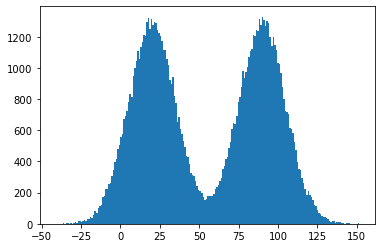

In [37]:
bimodal1 = np.random.normal(loc=90, scale=15, size=50000)
bimodal2 = np.random.normal(loc=20, scale=15, size=50000)

bimodal_test = np.concatenate((bimodal1, bimodal2))
plt.hist(bimodal_test, bins=200)


In [42]:
def plt_means(data, n_times):
    means = []
    for i in tqdm(range(n_times)):
        sample_pi = random.sample(set(data),50)
        means.append(np.mean(sample_pi))
    plt.hist(means, bins=20)

100%|██████████| 50/50 [00:07<00:00,  6.69it/s]


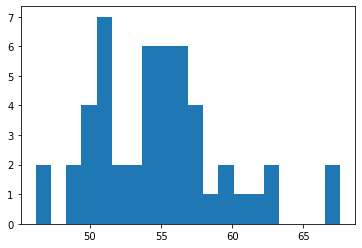

In [43]:
# central limit theorem (CLT) 
plt_means(bimodal_test, 50)

100%|██████████| 200/200 [00:38<00:00,  5.23it/s]


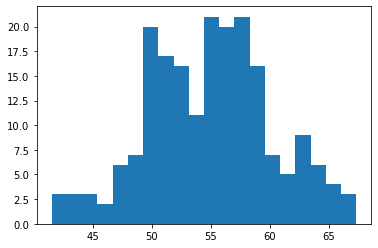

In [44]:
plt_means(bimodal_test, 200)